In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import urllib
from urllib.request import urlopen # to read and parse web pages

from bs4 import BeautifulSoup # to conver the html code into readable form

import ssl

import requests

import matplotlib.pyplot as plt

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    conda-4.6.8                |           py36_0         876 KB  conda-forge
    openssl-1.1.1b             |       h14c3975_1         4.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following packages will be UPDATED:

  ca-certificates                     2018.11.29-ha4d7672_0 --> 2019.3.9-hecc5488_0
  certifi                              2018.11.29-py36_1000 --> 2019.3.9-py36_0
  conda                                        4.6.4-py36_0 --> 4.6

In [2]:
url = 'http://www.city-data.com/nbmaps/neigh-New-York-New-York.html#N16'

#to avoid error on ssl certificate
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

#open and parse the url
html = urllib.request.urlopen(url, context=ctx).read()
soup = BeautifulSoup(html,'html.parser')

tags = soup.findAll("div", attrs={'class':'neighborhood'})

In [3]:
count = 0
manhattan_census = pd.DataFrame(columns = ['Neighborhood','Area','Population','Median household income 2016'])
for tag in tags:
    row = []
    neighborhood = tag.find("span", attrs={'class':'street-name'}).text
    row.append(neighborhood)
    for sec in tag.findAll('b'):
        if sec.text == 'Area:':
            area = sec.next_sibling
            row.append(area)
        if sec.text == 'Population:':
            population = sec.next_sibling
            row.append(population)
        if sec.text == 'Median household income in 2016: ':
            income = tag.findAll('table')[1].p.next_sibling
            row.append(income)
    try:
        manhattan_census.loc[count] = row
    except:
        continue
    count = count+1

manhattan_census

,Neighborhood,Area,Population,Median household income 2016
0,Battery Park City,0.207,"9,552","$126,771"
1,Bellevue,0.139,"7,060","$99,135"
2,Bowery,0.039,"2,106","$77,702"
3,Central Park,1.372,110,"$125,329"
4,Chelsea,0.774,"47,325","$116,160"
5,Chinatown,0.082,"7,596","$68,657"
6,City Hall,0.190,"15,800","$100,294"
7,Civic Center,0.795,"61,896","$104,375"
8,Downtown,4.309,"328,220","$92,878"
9,East Harlem,1.467,"125,763","$39,390"


In [4]:
manhattan_census.drop(25,inplace = True)
manhattan_census = manhattan_census.reset_index(drop = True)

In [5]:
manhattan_census.head()

,Neighborhood,Area,Population,Median household income 2016
0,Battery Park City,0.207,"9,552","$126,771"
1,Bellevue,0.139,"7,060","$99,135"
2,Bowery,0.039,"2,106","$77,702"
3,Central Park,1.372,110,"$125,329"
4,Chelsea,0.774,"47,325","$116,160"


In [6]:
manhattan_census.rename(columns = {'Median household income 2016':'Household Income'}, inplace = True)

In [7]:
manhattan_census['Area'] = manhattan_census['Area'].astype(float)*2.58999

In [8]:
manhattan_census.head()

,Neighborhood,Area,Population,Household Income
0,Battery Park City,0.536128,"9,552","$126,771"
1,Bellevue,0.360009,"7,060","$99,135"
2,Bowery,0.101010,"2,106","$77,702"
3,Central Park,3.553466,110,"$125,329"
4,Chelsea,2.004652,"47,325","$116,160"


In [9]:
population_nyc = manhattan_census['Population']

#this will remove the ',' from the values which will further enable me to convert the value to numeric type
pop_list_nyc = []
for pop in population_nyc:
    pop = pop.replace(',','')
    pop_list_nyc.append(pop)

#this actually converts the values into numeric type
pop_list_nyc = list(map(int, pop_list_nyc))

In [10]:
hh_income = manhattan_census['Household Income']

#this will remove the $ sign from the values
income_list = []
for income in hh_income:
    income = income[1:]
    income_list.append(income)

#this will remove the ',' from the values which will further enable me to convert the value to numeric type
inc_list_nyc = []
for income in income_list:
    inc = income.replace(',','')
    inc_list_nyc.append(inc)

#this actually converts the values into numeric type
inc_list_nyc = list(map(int, inc_list_nyc))

In [11]:
manhattan_census['Population'] = pop_list_nyc
manhattan_census['Household Income'] = inc_list_nyc
manhattan_census.head()

,Neighborhood,Area,Population,Household Income
0,Battery Park City,0.536128,9552,126771
1,Bellevue,0.360009,7060,99135
2,Bowery,0.101010,2106,77702
3,Central Park,3.553466,110,125329
4,Chelsea,2.004652,47325,116160


In [12]:
manhattan_census.sort_values('Household Income', ascending = False).head()

,Neighborhood,Area,Population,Household Income
41,Tribeca,0.862467,17362,196692
27,Meat Packing District,0.101010,1428,167712
39,Sutton Place,0.031080,526,162101
35,Seaport,0.233099,7450,154874
45,Union Square,0.598288,9526,146245


(array([10.,  5., 13., 20.,  3.,  3.,  1.]),
 array([ 33893.,  57150.,  80407., 103664., 126921., 150178., 173435.,
        196692.]),
 <a list of 7 Patch objects>)

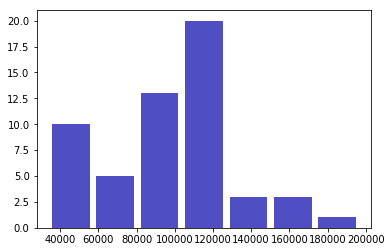

In [13]:
plt.hist(x=manhattan_census['Household Income'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [14]:
manhattan_census['Population normalized'] = manhattan_census['Population'] / manhattan_census['Population'].sum()
manhattan_census['Area normalized'] = manhattan_census['Area'] / manhattan_census['Area'].max()
manhattan_census['Household Income normalized'] = manhattan_census['Household Income'] / manhattan_census['Household Income'].max()
manhattan_census.head()

,Neighborhood,Area,Population,Household Income,Population normalized,Area normalized,Household Income normalized
0,Battery Park City,0.536128,9552,126771,0.002632,0.016757,0.644515
1,Bellevue,0.360009,7060,99135,0.001945,0.011252,0.504011
2,Bowery,0.101010,2106,77702,0.000580,0.003157,0.395044
3,Central Park,3.553466,110,125329,0.000030,0.111066,0.637184
4,Chelsea,2.004652,47325,116160,0.013040,0.062657,0.590568


In [15]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
nyc_location = geolocator.geocode(address)
nyc_latitude = nyc_location.latitude
nyc_longitude = nyc_location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(nyc_latitude, nyc_longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


In [17]:
neighborhoods = manhattan_census['Neighborhood']
longitude = []
latitude = []
drop_list = []
for neighborhood in neighborhoods:
    address = '{}, Manhattan, New York City, NY'.format(neighborhood)
    
    geolocator = Nominatim(user_agent="neighborhood_ny_explorer")
    location = geolocator.geocode(address)
    try:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        drop_list.append(neighborhood)
        print('No coordinates')

No coordinates
No coordinates
No coordinates
No coordinates


In [18]:
drop_list

['East Side', 'LoDel', 'Meat Packing District', 'Theatre District']

In [19]:
manhattan_census.drop(np.where(manhattan_census['Neighborhood'].isin(drop_list))[0], inplace=True)
manhattan_census = manhattan_census.reset_index(drop=True)
manhattan_census.shape

(51, 7)

In [20]:
manhattan_census['Latitude'] = latitude
manhattan_census['Longitude'] = longitude
manhattan_census['City'] = 'New York'
manhattan_census.head()

,Neighborhood,Area,Population,Household Income,Population normalized,Area normalized,Household Income normalized,Latitude,Longitude,City
0,Battery Park City,0.536128,9552,126771,0.002632,0.016757,0.644515,40.711017,-74.016937,New York
1,Bellevue,0.360009,7060,99135,0.001945,0.011252,0.504011,40.739267,-73.975360,New York
2,Bowery,0.101010,2106,77702,0.000580,0.003157,0.395044,40.722855,-73.993180,New York
3,Central Park,3.553466,110,125329,0.000030,0.111066,0.637184,40.783848,-73.964573,New York
4,Chelsea,2.004652,47325,116160,0.013040,0.062657,0.590568,40.746491,-74.001528,New York


In [21]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(manhattan_census['Latitude'], manhattan_census['Longitude'], manhattan_census['City'], manhattan_census['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [22]:
CLIENT_ID = 'BO3PNCW5XOMTDWPU0E2YBQSMEVIX2WCFHX33ZKLJY3JMZG53' # your Foursquare ID
CLIENT_SECRET = 'XNIUIJXXXFQR0L1CJT4MNN3AVIVU5PUQU3FN2T0WCZXJFNXE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BO3PNCW5XOMTDWPU0E2YBQSMEVIX2WCFHX33ZKLJY3JMZG53
CLIENT_SECRET:XNIUIJXXXFQR0L1CJT4MNN3AVIVU5PUQU3FN2T0WCZXJFNXE


In [23]:
LIMIT = 150

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
                  
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['categories'][0]['icon']['prefix'].split('/',7)[-2]) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Bigger Category']
        
    return(nearby_venues)

In [25]:
newyork_venues = getNearbyVenues(names=manhattan_census['Neighborhood'],
                                   latitudes=manhattan_census['Latitude'],
                                   longitudes=manhattan_census['Longitude']
                                  )

Battery Park City
Bellevue
Bowery
Central Park
Chelsea
Chinatown
City Hall
Civic Center
Downtown
East Harlem
East Village
Garment District
Gramercy Park
Gramercy-Flatiron
Greenwich Village
Hamilton Heights
Harlem
Hell's Kitchen
Inwood
Kips Bay
Lenox Hill
Little Italy
Lower East Side
Manhattan Valley
Manhattanville
Midtown
Midtown West
Morningside Heights
Murray Hill
NoHo
Nolita
Peter Cooper Village
Seaport
Soho
St. Nicholas Terrace
Stuyvesant Town
Sutton Place
Tribeca
Tudor City
Turtle Bay
Two Bridges
Union Square
Upper East Side
Upper West Side
Uptown
Wall Street
Washington Heights
West Side
West Village
World Trade Center
Yorkville


In [26]:
print(newyork_venues.shape)
newyork_venues.head()

(5100, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Bigger Category
0,Battery Park City,40.711017,-74.016937,Battery Park City Esplanade,40.711622,-74.017907,Park,parks_outdoors
1,Battery Park City,40.711017,-74.016937,Hudson Eats,40.712803,-74.016102,Food Court,shops
2,Battery Park City,40.711017,-74.016937,Equinox Brookfield Place,40.712704,-74.014995,Gym,building
3,Battery Park City,40.711017,-74.016937,"Waterfront Plaza, Brookfield Place",40.713241,-74.016241,Plaza,parks_outdoors
4,Battery Park City,40.711017,-74.016937,Liberty Park,40.710384,-74.013868,Park,parks_outdoors


In [27]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Bigger Category','Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

newyork_onehot.head()

,Neighborhood,arts_entertainment,building,education,food,nightlife,parks_outdoors,shops,travel,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Butcher,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Reservoir,Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shrine,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Synagogue,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterina

In [28]:
newyork_grouped = newyork_onehot.groupby(['Neighborhood']).sum().reset_index()
print(newyork_grouped.shape)
newyork_grouped.head()

(51, 290)


,Neighborhood,arts_entertainment,building,education,food,nightlife,parks_outdoors,shops,travel,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Butcher,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Reservoir,Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shrine,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Synagogue,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterina

In [29]:
venue_types = newyork_grouped.columns[9:]
venues_list = []
number_of_venues = []
for venue in venue_types:
    venues_list.append(venue)
    number_of_venues.append(newyork_grouped[venue].sum())
newyork_popular_venues = pd.DataFrame()
newyork_popular_venues['Venues'] = venues_list
newyork_popular_venues['Number of venues'] = number_of_venues
newyork_popular_venues.sort_values('Number of venues', ascending = False, inplace=True)
newyork_popular_venues.reset_index(drop = True, inplace = True)
newyork_popular_venues.head(10)

,Venues,Number of venues
0,Coffee Shop,169
1,Park,163
2,Italian Restaurant,158
3,American Restaurant,128
4,Pizza Place,128
5,Theater,127
6,Bakery,112
7,Gym,108
8,Hotel,96
9,Café,90


In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[9:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues_ny = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues_ny):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_ny = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_ny['Neighborhood'] = newyork_grouped['Neighborhood']

for ind in np.arange(newyork_grouped.shape[0]):
    neighborhoods_venues_sorted_ny.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues_ny)

neighborhoods_venues_sorted_ny['City'] = manhattan_census['City']
neighborhoods_venues_sorted_ny['Area'] = manhattan_census['Area']
neighborhoods_venues_sorted_ny['Household Income'] = manhattan_census['Household Income']
neighborhoods_venues_sorted_ny['Population'] = manhattan_census['Population']   
neighborhoods_venues_sorted_ny['Latitude'] = manhattan_census['Latitude']
neighborhoods_venues_sorted_ny['Longitude'] = manhattan_census['Longitude']
neighborhoods_venues_sorted_ny = neighborhoods_venues_sorted_ny[['Neighborhood','City','Latitude', 'Longitude',
 'Area',
 'Population',
 'Household Income',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']]
neighborhoods_venues_sorted_ny.head()

,Neighborhood,City,Latitude,Longitude,Area,Population,Household Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,New York,40.711017,-74.016937,0.536128,9552,126771,Park,Coffee Shop,Hotel,Wine Shop,Plaza,Gym,Gym / Fitness Center,Monument / Landmark,Food Court,Café
1,Bellevue,New York,40.739267,-73.975360,0.360009,7060,99135,Gym / Fitness Center,Korean Restaurant,American Restaurant,Pizza Place,New American Restaurant,Wine Shop,Vegetarian / Vegan Restaurant,Japanese Restaurant,Cocktail Bar,Gym
2,Bowery,New York,40.722855,-73.993180,0.101010,2106,77702,Italian Restaurant,Pizza Place,Mexican Restaurant,Hotel,French Restaurant,Gym,Yoga Studio,Bookstore,Spa,Seafood Restaurant
3,Central Park,New York,40.783848,-73.964573,3.553466,110,125329,Exhibit,Park,Italian Restaurant,Bookstore,Art Museum,American Restaurant,Playground,Bakery,Latin American Restaurant,Garden
4,Chelsea,New York,40.746491,-74.001528,2.004652,47325,116160,Art Gallery,Coffee Shop,Yoga Studio,Park,Lounge,Hotel,Salon / Barbershop,Cycle Studio,Gym / Fitness Center,Tapas Restaurant


In [32]:
def normalize(df):
    result = df.copy()
    columns = df.columns[1:]
    for feature_name in columns:
        sum_value = sum(list(df[feature_name]))
        result[feature_name] = df[feature_name] / sum_value
    return result

In [33]:
newyork_grouped = normalize(newyork_grouped)

In [34]:
newyork_final_table = newyork_grouped.merge(manhattan_census, on = 'Neighborhood')
newyork_final_table.head()

,Neighborhood,arts_entertainment,building,education,food,nightlife,parks_outdoors,shops,travel,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Butcher,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Reservoir,Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shrine,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Synagogue,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterina

In [35]:
def reorder_columns(df):
    columns = df.columns
    first_columns = list([columns[0], columns[-1],columns[-9], columns[-5], columns[-8], columns[-6], columns[-7], columns[-4], columns[-3], columns[-2]])
    last_columns = list(columns[1:-9])
    new_order = first_columns + last_columns
    new_df = df[new_order]
    return(new_df)

In [36]:
newyork_final_table = reorder_columns(newyork_final_table)

In [37]:
newyork_final_table.drop(['Latitude','Longitude'],1, inplace = True)

In [38]:
newyork_final_table.head()

,Neighborhood,City,Area,Area normalized,Population,Population normalized,Household Income,Household Income normalized,arts_entertainment,building,education,food,nightlife,parks_outdoors,shops,travel,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Butcher,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Reservoir,Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shrine,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Synagogue,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Rest

In [39]:
toronto = pd.read_csv('toronto_neighbourhood_profiles.csv')
toronto.drop(0, inplace = True)

In [40]:
area = list(toronto['Land area in square kilometres'])
income = list(toronto['  Average after-tax income of households in 2015 ($)'])
population = list(toronto['Population, 2016'])
nbh = list(toronto['Characteristic'])

In [41]:
toronto_census = pd.DataFrame()
toronto_census['Neighborhood'] = nbh
toronto_census['Area'] = area
toronto_census['Population'] = population
toronto_census['Household Income'] = income
toronto_census.head()

,Neighborhood,Area,Population,Household Income
0,Agincourt North,7.41,"29,113","427,037"
1,Agincourt South-Malvern West,7.83,"23,757","278,390"
2,Alderwood,4.95,"12,054","168,602"
3,Annex,2.81,"30,526","792,507"
4,Banbury-Don Mills,9.98,"27,695","493,486"


In [42]:
population_tor = toronto_census['Population']

#this will remove the ',' from the values which will further enable me to convert the value to numeric type
pop_list_tor = []
for pop in population_tor:
    pop = pop.replace(',','')
    pop_list_tor.append(pop)

#this actually converts the values into numeric type
pop_list_tor = list(map(int, pop_list_tor))

In [43]:
income_list_tor = toronto_census['Household Income']

inc_list_tor = []
for income in income_list_tor:
    inc = income.replace(',','')
    inc_list_tor.append(inc)

#this actually converts the values into numeric type
inc_list_tor = list(map(int, inc_list_tor))

In [44]:
toronto_census['Population'] = pop_list_tor
toronto_census['Household Income'] = inc_list_tor
toronto_census.head()

,Neighborhood,Area,Population,Household Income
0,Agincourt North,7.41,29113,427037
1,Agincourt South-Malvern West,7.83,23757,278390
2,Alderwood,4.95,12054,168602
3,Annex,2.81,30526,792507
4,Banbury-Don Mills,9.98,27695,493486


In [45]:
toronto_census.sort_values('Household Income', ascending = False).head()

,Neighborhood,Area,Population,Household Income
104,Rosedale-Moore Park,4.65,20923,1413132
16,Bridle Path-Sunnybrook-York Mills,8.91,9266,1392010
69,Lawrence Park South,3.24,15179,1216585
64,Kingsway South,2.58,9271,900624
58,Islington-City Centre West,16.21,43965,854623


(array([32., 36., 29., 11., 10.,  7.,  5.,  4.,  2.,  1.,  0.,  0.,  1.,
         0.,  2.]),
 array([ 102259.        ,  189650.53333333,  277042.06666667,
         364433.6       ,  451825.13333333,  539216.66666667,
         626608.2       ,  713999.73333333,  801391.26666667,
         888782.8       ,  976174.33333333, 1063565.86666667,
        1150957.4       , 1238348.93333333, 1325740.46666667,
        1413132.        ]),
 <a list of 15 Patch objects>)

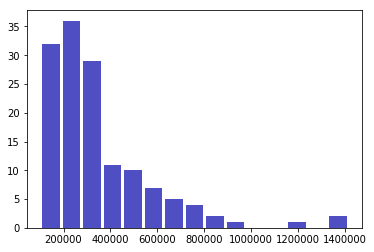

In [46]:
plt.hist(x=toronto_census['Household Income'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [47]:
toronto_census['Population normalized'] = toronto_census['Population'] / toronto_census['Population'].sum()
toronto_census['Area normalized'] = toronto_census['Area'] / toronto_census['Area'].max()
toronto_census['Household Income normalized'] = toronto_census['Household Income'] / toronto_census['Household Income'].max()
toronto_census.head()

,Neighborhood,Area,Population,Household Income,Population normalized,Area normalized,Household Income normalized
0,Agincourt North,7.41,29113,427037,0.010658,0.200867,0.302192
1,Agincourt South-Malvern West,7.83,23757,278390,0.008697,0.212253,0.197002
2,Alderwood,4.95,12054,168602,0.004413,0.134183,0.119311
3,Annex,2.81,30526,792507,0.011175,0.076172,0.560816
4,Banbury-Don Mills,9.98,27695,493486,0.010139,0.270534,0.349214


In [48]:
address = 'Toronto, ON'

geolocator_tor = Nominatim(user_agent="tor_explorer")
tor_location = geolocator_tor.geocode(address)
tor_latitude = tor_location.latitude
tor_longitude = tor_location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(tor_latitude, tor_longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [49]:
neighborhoods_tor = toronto_census['Neighborhood']
longitude_tor = []
latitude_tor = []
drop_list_tor = []
for neighborhood in neighborhoods_tor:
    address = '{}, Toronto, ON'.format(neighborhood)
    
    geolocator_tor = Nominatim(user_agent="neighborhood_tor_explorer")
    location_tor = geolocator_tor.geocode(address)
    try:
        latitude_tor.append(location_tor.latitude)
        longitude_tor.append(location_tor.longitude)
    except:
        drop_list_tor.append(neighborhood)
        print('No coordinates')

No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates
No coordinates


In [50]:
drop_list_tor

['Agincourt South-Malvern West',
 'Bedford Park-Nortown',
 'Beechborough-Greenbrook',
 'Birchcliffe-Cliffside',
 'Blake-Jones',
 'Briar Hill-Belgravia',
 'Bridle Path-Sunnybrook-York Mills',
 'Brookhaven-Amesbury',
 'Cabbagetown-South St. James Town',
 'Clairlea-Birchmount',
 'Dovercourt-Wallace Emerson-Junction',
 'Downsview-Roding-CFB',
 'Eringate-Centennial-West Deane',
 'Greenwood-Coxwell',
 'Humbermede',
 'Humewood-Cedarvale',
 'Kingsview Village-The Westway',
 'Lambton Baby Point',
 'Leaside-Bennington',
 'Mimico (includes Humber Bay Shores)',
 'Mount Olive-Silverstone-Jamestown',
 'Parkwoods-Donalda',
 'Playter Estates-Danforth',
 'Princess-Rosethorn',
 'Rockcliffe-Smythe',
 'St.Andrew-Windfields',
 "Tam O'Shanter-Sullivan",
 'Thistletown-Beaumond Heights',
 'Waterfront Communities-The Island',
 'West Humber-Clairville',
 'Westminster-Branson',
 'Weston-Pelham Park',
 'Wexford/Maryvale',
 'Willowridge-Martingrove-Richview',
 'Woodbine Corridor',
 'Woodbine-Lumsden']

In [51]:
toronto_census.drop(np.where(toronto_census['Neighborhood'].isin(drop_list_tor))[0], inplace=True)
toronto_census = toronto_census.reset_index(drop=True)
toronto_census.shape

(104, 7)

In [52]:
toronto_census['Latitude'] = latitude_tor
toronto_census['Longitude'] = longitude_tor
toronto_census['City'] = 'Toronto'
toronto_census.head()

,Neighborhood,Area,Population,Household Income,Population normalized,Area normalized,Household Income normalized,Latitude,Longitude,City
0,Agincourt North,7.41,29113,427037,0.010658,0.200867,0.302192,43.808038,-79.266439,Toronto
1,Alderwood,4.95,12054,168602,0.004413,0.134183,0.119311,43.601717,-79.545232,Toronto
2,Annex,2.81,30526,792507,0.011175,0.076172,0.560816,43.670338,-79.407117,Toronto
3,Banbury-Don Mills,9.98,27695,493486,0.010139,0.270534,0.349214,43.734804,-79.357243,Toronto
4,Bathurst Manor,4.70,15873,251583,0.005811,0.127406,0.178032,43.763893,-79.456367,Toronto


In [53]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[tor_latitude, tor_longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_census['Latitude'], toronto_census['Longitude'], toronto_census['City'], toronto_census['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [55]:
toronto_venues = getNearbyVenues(names=toronto_census['Neighborhood'],
                                   latitudes=toronto_census['Latitude'],
                                   longitudes=toronto_census['Longitude']
                                  )

Agincourt North
Alderwood
Annex
Banbury-Don Mills
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods-Steeles
Bendale
Black Creek
Broadview North
Caledonia-Fairbank
Casa Loma
Centennial Scarborough
Church-Yonge Corridor
Clanton Park
Cliffcrest
Corso Italia-Davenport
Danforth
Danforth East York
Don Valley Village
Dorset Park
Dufferin Grove
East End-Danforth
Edenbridge-Humber Valley
Eglinton East
Elms-Old Rexdale
Englemount-Lawrence
Etobicoke West Mall
Flemingdon Park
Forest Hill North
Forest Hill South
Glenfield-Jane Heights
Guildwood
Henry Farm
High Park North
High Park-Swansea
Highland Creek
Hillcrest Village
Humber Heights-Westmount
Humber Summit
Ionview
Islington-City Centre West
Junction Area
Keelesdale-Eglinton West
Kennedy Park
Kensington-Chinatown
Kingsway South
L'Amoreaux
Lansing-Westgate
Lawrence Park North
Lawrence Park South
Little Portugal
Long Branch
Malvern
Maple Leaf
Markland Wood
Milliken
Morningside
Moss Park
Mount Dennis
Mount Pleasant East
Mount Pleasant

In [56]:
print(toronto_venues.shape)
toronto_venues.head()

(6583, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Bigger Category
0,Agincourt North,43.808038,-79.266439,Saravanaa Bhavan South Indian Restaurant,43.810117,-79.269275,Indian Restaurant,food
1,Agincourt North,43.808038,-79.266439,Samosa King - Embassy Restaurant,43.810152,-79.257316,Indian Restaurant,food
2,Agincourt North,43.808038,-79.266439,Fahmee Bakery & Jamaican Foods,43.810170,-79.280113,Caribbean Restaurant,food
3,Agincourt North,43.808038,-79.266439,Grandeur Palace 華丽宮 (Grandeur Palace 華麗宮),43.797885,-79.270585,Chinese Restaurant,food
4,Agincourt North,43.808038,-79.266439,Shoppers Drug Mart,43.808119,-79.269744,Pharmacy,shops


In [57]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Bigger Category','Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns1 = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns1]

toronto_onehot.head()

,Zoo Exhibit,arts_entertainment,building,education,food,nightlife,parks_outdoors,shops,travel,Accessories Store,Afghan Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Lab,Pide Place,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Spea

In [58]:
toronto_grouped_raw = toronto_onehot.groupby(['Neighborhood']).sum().reset_index()
print(toronto_grouped_raw.shape)
zoo = toronto_grouped_raw['Zoo Exhibit']
toronto_grouped_rev = toronto_grouped_raw.drop('Zoo Exhibit',1)
toronto_grouped_rev['Zoo Exhibit'] = zoo
toronto_grouped = toronto_grouped_rev
toronto_grouped.head()

(104, 326)


,Neighborhood,arts_entertainment,building,education,food,nightlife,parks_outdoors,shops,travel,Accessories Store,Afghan Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Lab,Pide Place,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporti

In [59]:
venue_types_tor = toronto_grouped.columns[9:]
venues_list_tor = []
number_of_venues_tor = []
for venue in venue_types_tor:
    venues_list_tor.append(venue)
    number_of_venues_tor.append(toronto_grouped[venue].sum())
toronto_popular_venues = pd.DataFrame()
toronto_popular_venues['Venues'] = venues_list_tor
toronto_popular_venues['Number of venues'] = number_of_venues_tor
toronto_popular_venues.sort_values('Number of venues', ascending = False, inplace=True)
toronto_popular_venues.reset_index(drop = True, inplace = True)
toronto_popular_venues.head(10)

,Venues,Number of venues
0,Coffee Shop,518
1,Café,268
2,Pizza Place,227
3,Park,227
4,Bakery,185
5,Italian Restaurant,184
6,Sandwich Place,167
7,Grocery Store,149
8,Fast Food Restaurant,136
9,Restaurant,135


In [60]:
num_top_venues_tor = 10

columns = ['Neighborhood']
for ind in np.arange(num_top_venues_tor):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_tor = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_tor['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted_tor.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues_tor)

neighborhoods_venues_sorted_tor['City'] = toronto_census['City']
neighborhoods_venues_sorted_tor['Area'] = toronto_census['Area']
neighborhoods_venues_sorted_tor['Household Income'] = toronto_census['Household Income']
neighborhoods_venues_sorted_tor['Population'] = toronto_census['Population']
neighborhoods_venues_sorted_tor['Latitude'] = toronto_census['Latitude']
neighborhoods_venues_sorted_tor['Longitude'] = toronto_census['Longitude']
neighborhoods_venues_sorted_tor = neighborhoods_venues_sorted_tor[['Neighborhood','City', 'Latitude', 'Longitude',
 'Area',
 'Population',
 'Household Income',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']]
neighborhoods_venues_sorted_tor.head()

,Neighborhood,City,Latitude,Longitude,Area,Population,Household Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Toronto,43.808038,-79.266439,7.41,29113,427037,Indian Restaurant,Coffee Shop,Pharmacy,Chinese Restaurant,Discount Store,Park,Sandwich Place,Pizza Place,Department Store,Supermarket
1,Alderwood,Toronto,43.601717,-79.545232,4.95,12054,168602,Pharmacy,Park,Light Rail Station,Restaurant,Burger Joint,Coffee Shop,Toy / Game Store,Discount Store,Grocery Store,Pizza Place
2,Annex,Toronto,43.670338,-79.407117,2.81,30526,792507,Korean Restaurant,Italian Restaurant,Café,Restaurant,Grocery Store,Coffee Shop,Park,Sushi Restaurant,Bakery,Pizza Place
3,Banbury-Don Mills,Toronto,43.734804,-79.357243,9.98,27695,493486,Coffee Shop,Restaurant,American Restaurant,Clothing Store,Café,Park,Bike Shop,Other Great Outdoors,Juice Bar,Gourmet Shop
4,Bathurst Manor,Toronto,43.763893,-79.456367,4.70,15873,251583,Coffee Shop,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Grocery Store,Gym,Fried Chicken Joint,Sports Club,Gas Station,Liquor Store


In [61]:
toronto_grouped = normalize(toronto_grouped)

In [62]:
toronto_final_table = toronto_grouped.merge(toronto_census, on = 'Neighborhood')
toronto_final_table.head()

,Neighborhood,arts_entertainment,building,education,food,nightlife,parks_outdoors,shops,travel,Accessories Store,Afghan Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Lab,Pide Place,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporti

In [63]:
toronto_final_table = reorder_columns(toronto_final_table)

In [64]:
toronto_final_table.drop(['Latitude','Longitude'],1, inplace = True)

In [65]:
print(toronto_final_table.shape)
toronto_final_table.head()

(104, 333)


,Neighborhood,City,Area,Area normalized,Population,Population normalized,Household Income,Household Income normalized,arts_entertainment,building,education,food,nightlife,parks_outdoors,shops,travel,Accessories Store,Afghan Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Lab,Pide Place,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,

In [66]:
len(list(toronto_final_table.columns))

333

In [67]:
len(list(newyork_final_table.columns))

297

In [68]:
tor=list(toronto_final_table.columns)

In [69]:
nyc=list(newyork_final_table.columns)

In [70]:
same_venues = []
for x in tor:
    for y in nyc:
        if x == y:
            same_venues.append(x)
len(same_venues)

223

In [71]:
toronto_final_table = toronto_final_table[same_venues]
toronto_final_table.shape

(104, 223)

In [72]:
newyork_final_table = newyork_final_table[same_venues]
newyork_final_table.shape

(51, 223)

In [73]:
combined_table = newyork_final_table.append(toronto_final_table)
combined_table.reset_index(drop = True, inplace=True)
combined_table.head()

,Neighborhood,City,Area,Area normalized,Population,Population normalized,Household Income,Household Income normalized,arts_entertainment,building,education,food,nightlife,parks_outdoors,shops,travel,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Outdoor Supply Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Battery Park City,New York,0.536128,0.016757,9552,0.002632,126771,0.644515,0.012526,0.042553,0.0,0.011586,0.011719,0.045673,0.026601,0.027211,0.015625,0.25,0.0,0.0,0.000,0.000000,0.000000,0.166667,0.076923,0.03125,0.008929,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.04,0.00,0.0,0.000000,0.0,0.0,0.0,0.090909,0.043478,0.000000,0.022222,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.047619,0.011765,0.023669,0.0,0.0,0.0,0.000000,0.0,0.000000,0.047619,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.057143,0.000000,0.0,0.0,0.071429,0.0,0.000,0.041667,0.035714,0.5,0.0,0.0,0.00,0.000000,0.0,0.125,0.05,0.013333,0.0,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.016949,0.027778,0.036145,0.000000,0.000000,0.0,0.0,0.111111,0.000000,0.0,0.0,0.031250,0.043478,0.034483,0.000000,0.0,0.000000,0.006329,0.013158,0.000000,0.043478,0.000000,0.0000

In [74]:
toronto_final_table['Population normalized'].median()

0.005973851677294861

In [75]:
newyork_final_table['Population normalized'].median()

0.006848905528033367

In [76]:
toronto_final_table['Household Income normalized'].median()

0.18703914425545526

In [77]:
newyork_final_table['Household Income normalized'].median()

0.5248510361377179

In [78]:
toronto_final_table['Area normalized'].median()

0.0802385470317159

In [79]:
newyork_final_table['Area normalized'].median()

0.032461750182141993

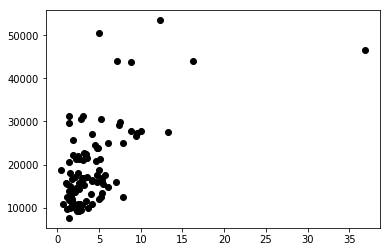

In [80]:
x = toronto_final_table['Area']
y = toronto_final_table['Population']
plt.plot(x, y, 'o', color='black')

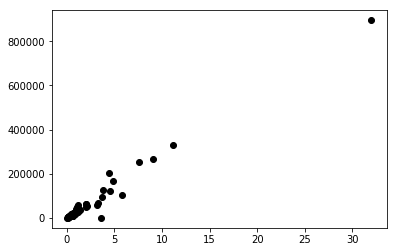

In [81]:
x = newyork_final_table['Area']
y = newyork_final_table['Population']
plt.plot(x, y, 'o', color='black')

In [82]:
combined_neighborhoods_venues_sorted = neighborhoods_venues_sorted_ny.append(neighborhoods_venues_sorted_tor)
combined_neighborhoods_venues_sorted.reset_index(drop = True, inplace=True)

combined_neighborhoods_venues_sorted.head()

,Neighborhood,City,Latitude,Longitude,Area,Population,Household Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,New York,40.711017,-74.016937,0.536128,9552,126771,Park,Coffee Shop,Hotel,Wine Shop,Plaza,Gym,Gym / Fitness Center,Monument / Landmark,Food Court,Café
1,Bellevue,New York,40.739267,-73.975360,0.360009,7060,99135,Gym / Fitness Center,Korean Restaurant,American Restaurant,Pizza Place,New American Restaurant,Wine Shop,Vegetarian / Vegan Restaurant,Japanese Restaurant,Cocktail Bar,Gym
2,Bowery,New York,40.722855,-73.993180,0.101010,2106,77702,Italian Restaurant,Pizza Place,Mexican Restaurant,Hotel,French Restaurant,Gym,Yoga Studio,Bookstore,Spa,Seafood Restaurant
3,Central Park,New York,40.783848,-73.964573,3.553466,110,125329,Exhibit,Park,Italian Restaurant,Bookstore,Art Museum,American Restaurant,Playground,Bakery,Latin American Restaurant,Garden
4,Chelsea,New York,40.746491,-74.001528,2.004652,47325,116160,Art Gallery,Coffee Shop,Yoga Studio,Park,Lounge,Hotel,Salon / Barbershop,Cycle Studio,Gym / Fitness Center,Tapas Restaurant


In [83]:
venue_categories = list(combined_table.columns[16:])
venue_bigger_categories = list(combined_table.columns[8:16])

In [84]:
vc = venue_categories + ['Neighborhood', 'City','Area', 'Population', 'Household Income']
vbc = venue_bigger_categories + ['Neighborhood', 'City','Area', 'Population', 'Household Income']

Text(0, 0.5, 'Sum of squared distance')

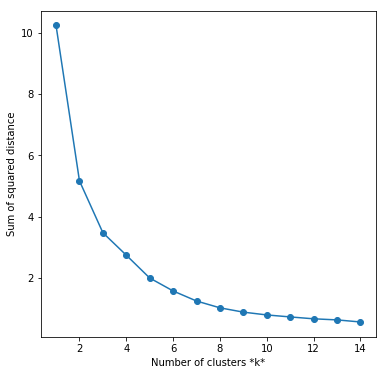

In [85]:
list_k = list(range(1, 15))
sse = []

for k in list_k:
    combined_clustering = combined_table.drop(vc, 1)
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(combined_clustering)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [86]:
kclusters = 5

combined_clustering = combined_table.drop(vc, 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(combined_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 3, 0, 0, 3, 3, 3, 3, 1], dtype=int32)

In [87]:
combined_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [88]:
combined_neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,City,Latitude,Longitude,Area,Population,Household Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Battery Park City,New York,40.711017,-74.016937,0.536128,9552,126771,Park,Coffee Shop,Hotel,Wine Shop,Plaza,Gym,Gym / Fitness Center,Monument / Landmark,Food Court,Café
1,3,Bellevue,New York,40.739267,-73.975360,0.360009,7060,99135,Gym / Fitness Center,Korean Restaurant,American Restaurant,Pizza Place,New American Restaurant,Wine Shop,Vegetarian / Vegan Restaurant,Japanese Restaurant,Cocktail Bar,Gym
2,3,Bowery,New York,40.722855,-73.993180,0.101010,2106,77702,Italian Restaurant,Pizza Place,Mexican Restaurant,Hotel,French Restaurant,Gym,Yoga Studio,Bookstore,Spa,Seafood Restaurant
3,0,Central Park,New York,40.783848,-73.964573,3.553466,110,125329,Exhibit,Park,Italian Restaurant,Bookstore,Art Museum,American Restaurant,Playground,Bakery,Latin American Restaurant,Garden
4,0,Chelsea,New York,40.746491,-74.001528,2.004652,47325,116160,Art Gallery,Coffee Shop,Yoga Studio,Park,Lounge,Hotel,Salon / Barbershop,Cycle Studio,Gym / Fitness Center,Tapas Restaurant


In [100]:
combined_neighborhoods_venues_sorted.loc[combined_neighborhoods_venues_sorted['Cluster Labels'] == 2]

,Cluster Labels,Neighborhood,City,Latitude,Longitude,Area,Population,Household Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,2,Uptown,New York,40.74153,-73.988999,31.994146,895135,77558,Gym,American Restaurant,New American Restaurant,Korean Restaurant,Cycle Studio,Japanese Restaurant,Coffee Shop,Gym / Fitness Center,Yoga Studio,Sandwich Place
131,2,Rouge,Toronto,43.80493,-79.165837,36.890000,46496,729154,Park,Pizza Place,Zoo Exhibit,Pharmacy,Bakery,Hardware Store,Discount Store,Campground,Eye Doctor,Falafel Restaurant


In [107]:
new_york = combined_neighborhoods_venues_sorted.loc[combined_neighborhoods_venues_sorted['City'] == 'New York']
new_york = new_york.loc[new_york['Cluster Labels'] == 4]
new_york['Neighborhood']

18                Inwood
46    Washington Heights
Name: Neighborhood, dtype: object

In [91]:
# create map
nyc_clusters = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new_york['Latitude'], new_york['Longitude'], new_york['Neighborhood'], new_york['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(nyc_clusters)
       
nyc_clusters

In [108]:
toronto_city = combined_neighborhoods_venues_sorted.loc[combined_neighborhoods_venues_sorted['City'] == 'Toronto']
toronto_city.head()

,Cluster Labels,Neighborhood,City,Latitude,Longitude,Area,Population,Household Income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,3,Agincourt North,Toronto,43.808038,-79.266439,7.41,29113,427037,Indian Restaurant,Coffee Shop,Pharmacy,Chinese Restaurant,Discount Store,Park,Sandwich Place,Pizza Place,Department Store,Supermarket
52,1,Alderwood,Toronto,43.601717,-79.545232,4.95,12054,168602,Pharmacy,Park,Light Rail Station,Restaurant,Burger Joint,Coffee Shop,Toy / Game Store,Discount Store,Grocery Store,Pizza Place
53,0,Annex,Toronto,43.670338,-79.407117,2.81,30526,792507,Korean Restaurant,Italian Restaurant,Café,Restaurant,Grocery Store,Coffee Shop,Park,Sushi Restaurant,Bakery,Pizza Place
54,3,Banbury-Don Mills,Toronto,43.734804,-79.357243,9.98,27695,493486,Coffee Shop,Restaurant,American Restaurant,Clothing Store,Café,Park,Bike Shop,Other Great Outdoors,Juice Bar,Gourmet Shop
55,1,Bathurst Manor,Toronto,43.763893,-79.456367,4.70,15873,251583,Coffee Shop,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Grocery Store,Gym,Fried Chicken Joint,Sports Club,Gas Station,Liquor Store


In [109]:
# create map
tor_clusters = folium.Map(location=[tor_latitude, tor_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_city['Latitude'], toronto_city['Longitude'], toronto_city['Neighborhood'], toronto_city['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(tor_clusters)
       
tor_clusters

In [75]:
manhattan_census['Population'].sum()

3.9508498718070455